In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def read_data(path):

  train_path=path+"/train"
  test_path=path+"/test"
  validation_path=path+"/val"

  train_data,test_data,val_data = [],[],[]
  tr_out,test_out,val_out = [],[],[]
  
  for i in os.listdir(train_path):

      if i != ".DS_Store":
          for j in os.listdir(train_path+"/"+i):
              train_data.append(cv2.imread(train_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              tr_out.append(i)

          for j in os.listdir(test_path+"/"+i):
              test_data.append(cv2.imread(test_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              test_out.append(i)

          for j in os.listdir(validation_path+"/"+i):
              val_data.append(cv2.imread(validation_path+"/"+i+"/"+j, cv2.IMREAD_GRAYSCALE))
              val_out.append(i)
    
  train_data, test_data, val_data = np.array(train_data), np.array(test_data), np.array(val_data)
  tr_out, test_out, val_out = np.array(list(map(int, tr_out))), np.array(list(map(int, test_out))), np.array(list(map(int, val_out)))

  return train_data, test_data, val_data, tr_out, test_out, val_out


In [4]:
path = "C:/Users/Ankit Mehra/Downloads/Group_5/Group_5"
train_data,test_data,val_data,tr_out,test_out,val_out = read_data(path)

In [5]:
train_data = train_data/255
test_data = test_data/255
val_data = val_data/255

In [6]:
labels=[0,1,2,4,7]

# Architechture for Autoencoder for 3 hidden layers with 400-256-400 

In [7]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out351 = keras.layers.Dense(400,activation='sigmoid')(x)
encoder351 = keras.Model(x_in,encoder_out351,name="encoder332")

encoder_out352 = keras.layers.Dense(256,activation='sigmoid')(encoder_out351)
encoder352 = keras.Model(x_in,encoder_out352,name="encoder332")

decoder_ip330 = keras.layers.Dense(400,activation='sigmoid')(encoder_out352)

decoder_ip331 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip330)

decoder_op332 = keras.layers.Reshape((28,28,1))(decoder_ip331)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder35 = keras.Model(x_in,decoder_op332,name="Autoencoder35")
Autoencoder35.summary()


Model: "Autoencoder35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 256)               102656    
                                                                 
 dense_2 (Dense)             (None, 400)               102800    
                                                                 
 dense_3 (Dense)             (None, 784)               314384    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)       

Epoch 1/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0475 - accuracy: 0.6377 - val_loss: 0.0271 - val_accuracy: 0.6512
Epoch 2/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0202 - accuracy: 0.6551 - val_loss: 0.0163 - val_accuracy: 0.6570
Epoch 3/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0144 - accuracy: 0.6580 - val_loss: 0.0134 - val_accuracy: 0.6584
Epoch 4/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0122 - accuracy: 0.6590 - val_loss: 0.0119 - val_accuracy: 0.6591
Epoch 5/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0109 - accuracy: 0.6596 - val_loss: 0.0113 - val_accuracy: 0.6593
Epoch 6/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0101 - accuracy: 0.6599 - val_loss: 0.0107 - val_accuracy: 0.6595
Epoch 7/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0096 - accuracy: 0.6601 - val_loss: 0.0106 - val_accuracy: 0.6596

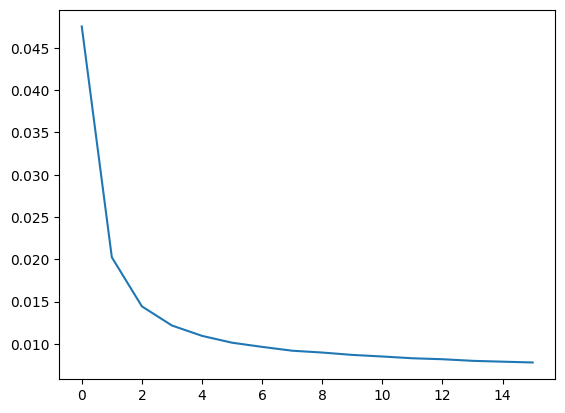

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)
Autoencoder35.compile(optimizer,loss="mse",metrics=['accuracy'])
history35 = Autoencoder35.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
plt.plot(history35.history['loss'])

In [9]:
tr_loss,mse_tr=Autoencoder35.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder35.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder35.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.6597
0.00730656273663044
0.010175689123570919
0.010248101316392422


1/1 [==============================] - 0s 116ms/step


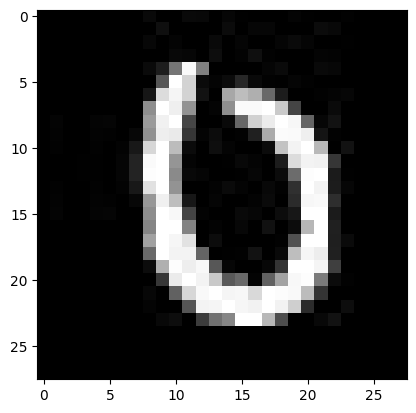

In [10]:

model_op35 = Autoencoder35.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")

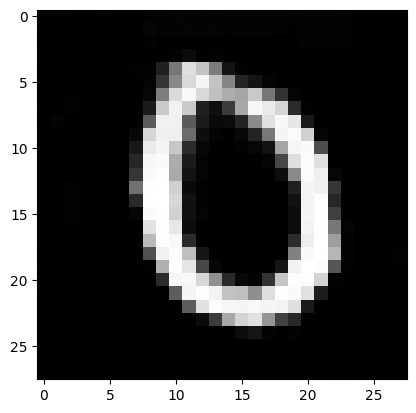

In [11]:

model_op35=model_op35.reshape(28,28)
plt.imshow(model_op35,cmap="gray")

In [12]:
encoded_train_256 = encoder352.predict(train_data)
encoded_val_256 = encoder352.predict(val_data)
encoded_test_256 = encoder352.predict(test_data)
print(encoded_train_256.shape)
print(encoded_val_256.shape)
print(encoded_test_256.shape)

119/119 [==============================] - 0s 1ms/step
(11385, 256)
(3795, 256)
(3795, 256)


# Original and reconstructed image for each class in architecture 1


1/1 [==============================] - 0s 16ms/step


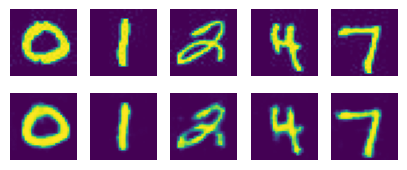

In [50]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder35.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Validation data

1/1 [==============================] - 0s 11ms/step


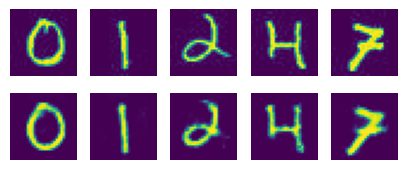

In [52]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder35.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Test Data

1/1 [==============================] - 0s 19ms/step


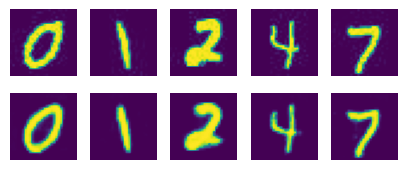

In [53]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder35.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Architechture for Autoencoder for 3 hidden layers with 400-128-400 

In [18]:

x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out341 = keras.layers.Dense(400,activation='sigmoid')(x)
encoder341 = keras.Model(x_in,encoder_out341,name="encoder341")

encoder_out342 = keras.layers.Dense(128,activation='sigmoid')(encoder_out341)
encoder342 = keras.Model(x_in,encoder_out342,name="encoder342")

decoder_ip330 = keras.layers.Dense(400,activation='sigmoid')(encoder_out342)

decoder_ip331 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip330)

decoder_op332 = keras.layers.Reshape((28,28,1))(decoder_ip331)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder34 = keras.Model(x_in,decoder_op332,name="Autoencoder34")
Autoencoder34.summary()

Model: "Autoencoder34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 400)               314000    
                                                                 
 dense_5 (Dense)             (None, 128)               51328     
                                                                 
 dense_6 (Dense)             (None, 400)               51600     
                                                                 
 dense_7 (Dense)             (None, 784)               314384    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0489 - accuracy: 0.6365 - val_loss: 0.0299 - val_accuracy: 0.6496
Epoch 2/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0222 - accuracy: 0.6540 - val_loss: 0.0179 - val_accuracy: 0.6562
Epoch 3/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0159 - accuracy: 0.6573 - val_loss: 0.0144 - val_accuracy: 0.6579
Epoch 4/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0133 - accuracy: 0.6585 - val_loss: 0.0126 - val_accuracy: 0.6588
Epoch 5/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0119 - accuracy: 0.6592 - val_loss: 0.0120 - val_accuracy: 0.6590
Epoch 6/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0111 - accuracy: 0.6595 - val_loss: 0.0114 - val_accuracy: 0.6592
Epoch 7/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0103 - accuracy: 0.6598 - val_loss: 0.0112 - val_accuracy: 0.6594

Epoch 58/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.6613 - val_loss: 0.0106 - val_accuracy: 0.6597
Epoch 59/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0061 - accuracy: 0.6613 - val_loss: 0.0107 - val_accuracy: 0.6597
Epoch 60/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0061 - accuracy: 0.6613 - val_loss: 0.0107 - val_accuracy: 0.6597
Epoch 61/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.6613 - val_loss: 0.0107 - val_accuracy: 0.6597
Epoch 62/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0060 - accuracy: 0.6613 - val_loss: 0.0107 - val_accuracy: 0.6597
Epoch 63/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0060 - accuracy: 0.6613 - val_loss: 0.0107 - val_accuracy: 0.6597
Epoch 64/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0059 - accuracy: 0.6613 - val_loss: 0.0108 - val_accuracy:

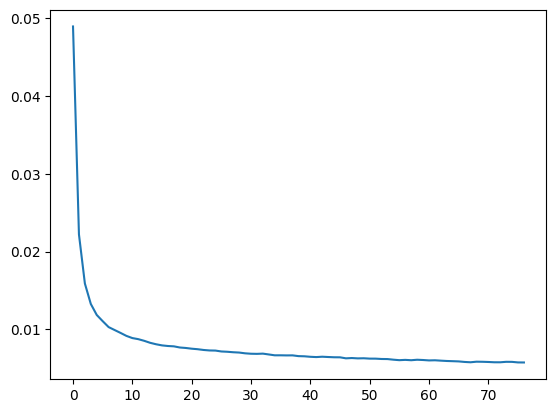

In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder34.compile(optimizer,loss="mse",metrics=['accuracy'])
history34 = Autoencoder34.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
plt.plot(history34.history['loss'])

In [20]:
tr_loss,mse_tr=Autoencoder34.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder34.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder34.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.6594
0.0054962714202702045
0.010941553860902786
0.0110710384324193


1/1 [==============================] - 0s 64ms/step


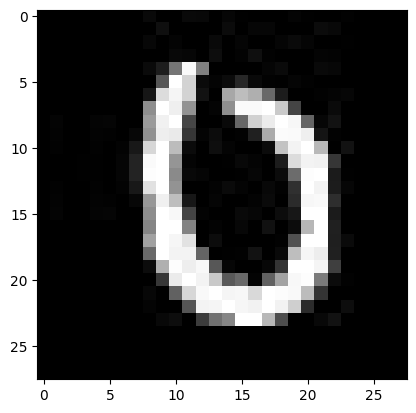

In [21]:
model_op34 = Autoencoder34.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")

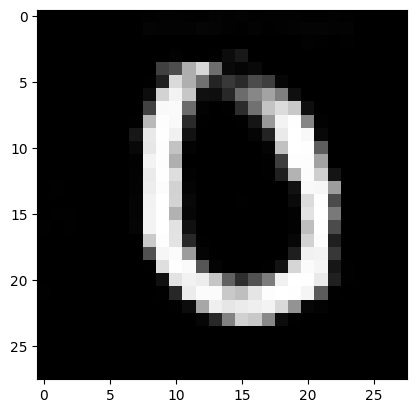

In [22]:
model_op34=model_op34.reshape(28,28)
plt.imshow(model_op34,cmap="gray")

In [23]:
encoded_train_128 = encoder342.predict(train_data)
encoded_val_128 = encoder342.predict(val_data)
encoded_test_128 = encoder342.predict(test_data)
print(encoded_train_128.shape)
print(encoded_val_128.shape)
print(encoded_test_128.shape)

119/119 [==============================] - 0s 935us/step
(11385, 128)
(3795, 128)
(3795, 128)


# Original and reconstructed image for each class in architecture 2


1/1 [==============================] - 0s 18ms/step


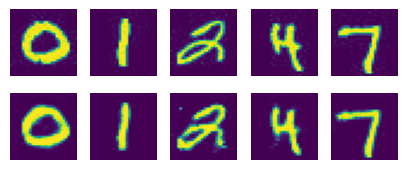

In [54]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder34.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Validation Test

1/1 [==============================] - 0s 17ms/step


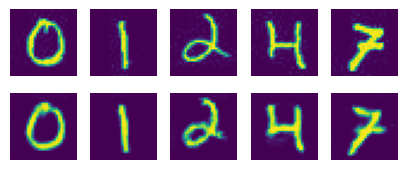

In [57]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder34.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Test data

1/1 [==============================] - 0s 19ms/step


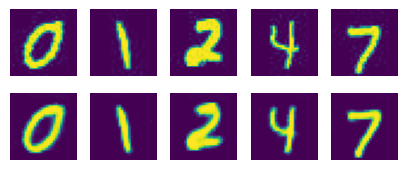

In [58]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder34.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Architechture for Autoencoder for 3 hidden layers with 400-64-400 

In [29]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out332 = keras.layers.Dense(400,activation='sigmoid')(x)
encoder332 = keras.Model(x_in,encoder_out332,name="encoder332")

encoder_out332 = keras.layers.Dense(64,activation='sigmoid')(encoder_out332)
encoder332 = keras.Model(x_in,encoder_out332,name="encoder332")

decoder_ip330 = keras.layers.Dense(400,activation='sigmoid')(encoder_out332)

decoder_ip331 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip330)

decoder_op332 = keras.layers.Reshape((28,28,1))(decoder_ip331)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder33 = keras.Model(x_in,decoder_op332,name="Autoencoder33")
Autoencoder33.summary()

Model: "Autoencoder33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 400)               314000    
                                                                 
 dense_9 (Dense)             (None, 64)                25664     
                                                                 
 dense_10 (Dense)            (None, 400)               26000     
                                                                 
 dense_11 (Dense)            (None, 784)               314384    
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.6308 - val_loss: 0.0394 - val_accuracy: 0.6436
Epoch 2/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0286 - accuracy: 0.6503 - val_loss: 0.0228 - val_accuracy: 0.6536
Epoch 3/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.6555 - val_loss: 0.0174 - val_accuracy: 0.6565
Epoch 4/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0157 - accuracy: 0.6574 - val_loss: 0.0148 - val_accuracy: 0.6577
Epoch 5/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0137 - accuracy: 0.6583 - val_loss: 0.0131 - val_accuracy: 0.6585
Epoch 6/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0124 - accuracy: 0.6589 - val_loss: 0.0123 - val_accuracy: 0.6588
Epoch 7/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0115 - accuracy: 0.6593 - val_loss: 0.0118 - val_accuracy: 0.6591

Epoch 58/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0058 - accuracy: 0.6613 - val_loss: 0.0098 - val_accuracy: 0.6599
Epoch 59/100
356/356 [==============================] - 2s 5ms/step - loss: 0.0058 - accuracy: 0.6613 - val_loss: 0.0099 - val_accuracy: 0.6599
Epoch 60/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0058 - accuracy: 0.6613 - val_loss: 0.0099 - val_accuracy: 0.6599
Epoch 61/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 0.6613 - val_loss: 0.0099 - val_accuracy: 0.6599
Epoch 62/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.6613 - val_loss: 0.0100 - val_accuracy: 0.6599
Epoch 63/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0058 - accuracy: 0.6613 - val_loss: 0.0099 - val_accuracy: 0.6599
Epoch 64/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0057 - accuracy: 0.6613 - val_loss: 0.0102 - val_accuracy:

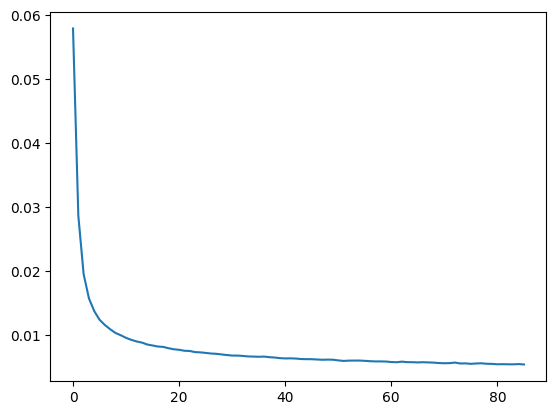

In [30]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder33.compile(optimizer,loss="mse",metrics=['accuracy'])
history33 = Autoencoder33.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
plt.plot(history33.history['loss'])

In [31]:
tr_loss,mse_tr=Autoencoder33.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder33.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder33.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.6597
0.005097340792417526
0.010057077743113041
0.010239118710160255


1/1 [==============================] - 0s 71ms/step


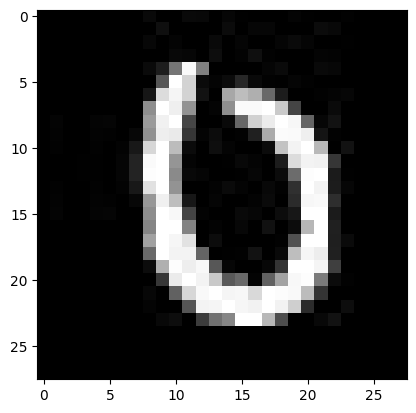

In [32]:
model_op33 = Autoencoder33.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")

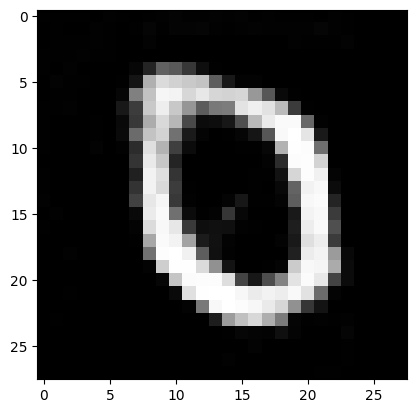

In [33]:
model_op33=model_op33.reshape(28,28)
plt.imshow(model_op33,cmap="gray")

In [34]:
encoded_train_64 = encoder332.predict(train_data)
encoded_val_64 = encoder332.predict(val_data)
encoded_test_64 = encoder332.predict(test_data)
print(encoded_train_64.shape)
print(encoded_val_64.shape)
print(encoded_test_64.shape)

119/119 [==============================] - 0s 924us/step
(11385, 64)
(3795, 64)
(3795, 64)


# Original and reconstructed image for each class in architecture 3


1/1 [==============================] - 0s 18ms/step


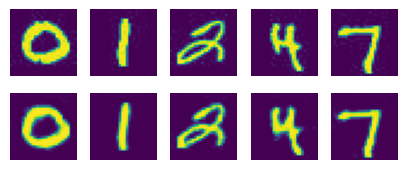

In [55]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder33.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Validation data

1/1 [==============================] - 0s 18ms/step


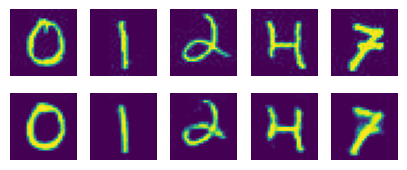

In [59]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder33.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Test data

1/1 [==============================] - 0s 14ms/step


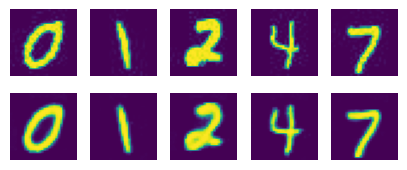

In [60]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder33.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

# Architechture for Autoencoder for 3 hidden layers with 400-32-400 

In [38]:
x_in = keras.Input(shape=(28,28,1),name="img")
x = keras.layers.Flatten()(x_in)
encoder_out321 = keras.layers.Dense(400,activation='sigmoid')(x)
encoder321 = keras.Model(x_in,encoder_out321,name="encoder321")

encoder_out322 = keras.layers.Dense(32,activation='sigmoid')(encoder_out321)
encoder322 = keras.Model(x_in,encoder_out322,name="encoder322")

decoder_ip320 = keras.layers.Dense(400,activation='sigmoid')(encoder_out322)

decoder_ip321 = keras.layers.Dense(784,activation='sigmoid')(decoder_ip320)

decoder_op322 = keras.layers.Reshape((28,28,1))(decoder_ip321)
optimizer = keras.optimizers.Adam(learning_rate = 0.01,decay = 1e-6)

Autoencoder32 = keras.Model(x_in,decoder_op322,name="Autoencoder32")
Autoencoder32.summary()


Model: "Autoencoder32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 400)               314000    
                                                                 
 dense_13 (Dense)            (None, 32)                12832     
                                                                 
 dense_14 (Dense)            (None, 400)               13200     
                                                                 
 dense_15 (Dense)            (None, 784)               314384    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)       

Epoch 1/100
356/356 [==============================] - 2s 4ms/step - loss: 0.0574 - accuracy: 0.6308 - val_loss: 0.0444 - val_accuracy: 0.6394
Epoch 2/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.6467 - val_loss: 0.0267 - val_accuracy: 0.6513
Epoch 3/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0231 - accuracy: 0.6535 - val_loss: 0.0204 - val_accuracy: 0.6549
Epoch 4/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0187 - accuracy: 0.6559 - val_loss: 0.0175 - val_accuracy: 0.6564
Epoch 5/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.6571 - val_loss: 0.0157 - val_accuracy: 0.6573
Epoch 6/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0147 - accuracy: 0.6579 - val_loss: 0.0148 - val_accuracy: 0.6577
Epoch 7/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0136 - accuracy: 0.6584 - val_loss: 0.0137 - val_accuracy: 0.6582

Epoch 58/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0064 - accuracy: 0.6612 - val_loss: 0.0099 - val_accuracy: 0.6598
Epoch 59/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0064 - accuracy: 0.6612 - val_loss: 0.0101 - val_accuracy: 0.6598
Epoch 60/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0063 - accuracy: 0.6612 - val_loss: 0.0103 - val_accuracy: 0.6598
Epoch 61/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0063 - accuracy: 0.6612 - val_loss: 0.0100 - val_accuracy: 0.6598
Epoch 62/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0063 - accuracy: 0.6612 - val_loss: 0.0102 - val_accuracy: 0.6598
Epoch 63/100
356/356 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 0.6612 - val_loss: 0.0102 - val_accuracy: 0.6598
Epoch 64/100
356/356 [==============================] - 1s 3ms/step - loss: 0.0063 - accuracy: 0.6612 - val_loss: 0.0101 - val_accuracy:

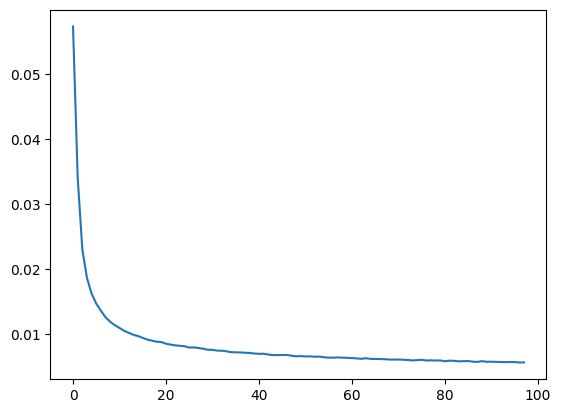

In [39]:

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
Autoencoder32.compile(optimizer,loss="mse",metrics=['accuracy'])
history32 = Autoencoder32.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback],validation_data=(val_data, val_data))
history_val32 = Autoencoder32.fit(train_data,train_data,epochs=100,batch_size=32,callbacks=[callback])
plt.plot(history32.history['loss'])

In [40]:
tr_loss,mse_tr=Autoencoder32.evaluate(train_data,train_data)
val_loss,mse_val=Autoencoder32.evaluate(val_data,val_data)
ts_loss,mse_ts=Autoencoder32.evaluate(test_data,test_data)
print(tr_loss)
print(val_loss)
print(ts_loss)

119/119 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.6595
0.005381816998124123
0.010420734994113445
0.010583840310573578


1/1 [==============================] - 0s 67ms/step


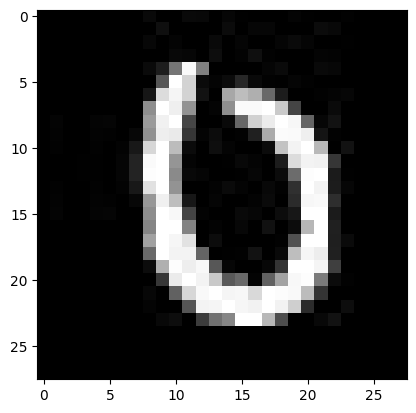

In [41]:
model_op31 = Autoencoder32.predict([test_data[1].reshape(-1,28,28,1)])
plt.imshow(test_data[1],cmap="gray")

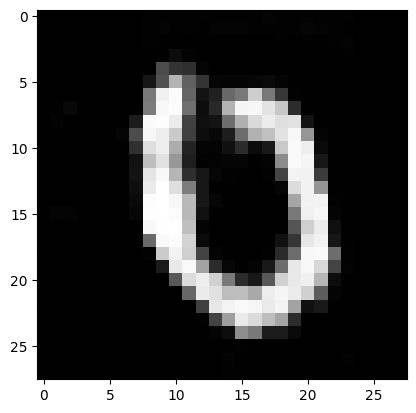

In [42]:
model_op31=model_op31.reshape(28,28)
plt.imshow(model_op31,cmap="gray")

In [43]:
encoded_train_32 =encoder322.predict(train_data)
encoded_val_32 = encoder322.predict(val_data)
encoded_test_32 =encoder322.predict(test_data)
print(encoded_train_32.shape)
print(encoded_val_32.shape)
print(encoded_test_32.shape)

119/119 [==============================] - 0s 1ms/step
(11385, 32)
(3795, 32)
(3795, 32)


# Original and reconstructed image for each class in architecture 4


1/1 [==============================] - 0s 17ms/step


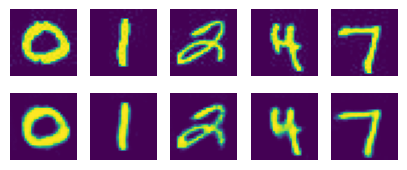

In [56]:
rand = [118,3437,6127,8363, 9141] # random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(train_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder32.predict([train_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Validation Data

1/1 [==============================] - 0s 12ms/step


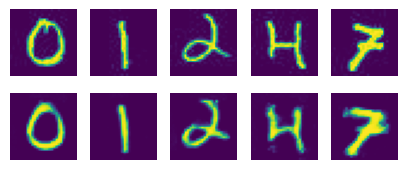

In [61]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(val_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder32.predict([val_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
# plt.title ("Comparison of original ans reconstructed images in architecture 4")
plt.show()

# Test Data 

1/1 [==============================] - 0s 18ms/step


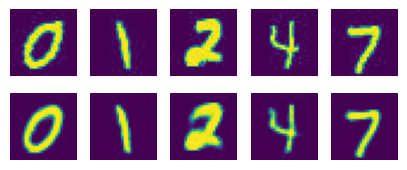

In [62]:
rand = [118,1127,1927,2427,3427]# random list of index for random images
fig, axs = plt.subplots(2, 5, figsize=(5, 2))    
for i in range(5):
    axs[0, i].imshow(test_data[rand[i]].reshape(28, 28)) # orignal image
    axs[0, i].axis('off')
       
    axs[1, i].imshow(Autoencoder32.predict([test_data[rand[i]].reshape(-1,28,28,1)]).reshape(28,28)) # reconstructed image
    axs[1, i].axis('off')
plt.show()

In [35]:
# To get compressed representation of image from train_data, val_dat, test_data for using that compressed representation in classifiction.
encoder_train5 = encoder322.predict([train_data.reshape(-1,28,28,1)])
encoder_val5 = encoder322.predict([val_data.reshape(-1,28,28,1)])
encoder_test5 = encoder322.predict([test_data.reshape(-1,28,28,1)])

print(encoder_train5.shape)
print(encoder_val5.shape)
print(encoder_test5.shape)

119/119 [==============================] - 0s 862us/step
(11385, 32)
(3795, 32)
(3795, 32)


# Classification task using inputs from autoencoders


# Different autoencoders input for model 1 -> 512-256-256

In [36]:
# Model of FCNN with 3 hidden layers for classification 
model53 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model53.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained3 = model53.fit(encoded_train_256, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.4758 - accuracy: 0.8240
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9664
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9715
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9758
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0624 - accuracy: 0.9799
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.9826
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9828
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9840
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

In [38]:
# For getting validation loss and accuracy.
loss_train_256, mse_train_256 = model53.evaluate(encoded_train_256, tr_out)
loss_val_256, mse_val_256 = model53.evaluate(encoded_val_256, val_out)
loss_test_256, mse_test_256 = model53.evaluate(encoded_test_256, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9826


119/119 [==============================] - 0s 875us/step


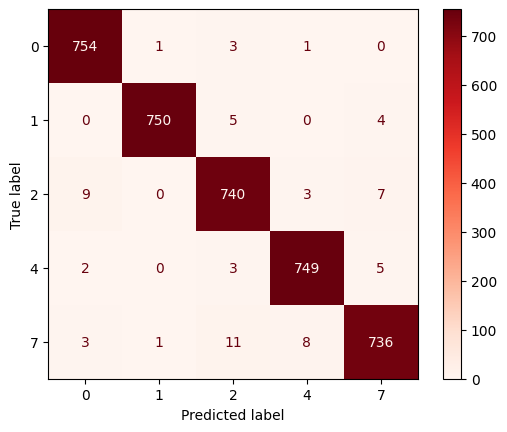

In [45]:
predictions3 = model53.predict(encoded_test_256,verbose=1)
p_class3 = np.argmax(predictions3, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm3=confusion_matrix(test_out, p_class3)
display=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

In [47]:
# Model of FCNN with 3 hidden layers for classification 
model54 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model54.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [48]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained4 = model54.fit(encoded_train_128, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.5659 - accuracy: 0.7915
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1521 - accuracy: 0.9514
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9585
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1142 - accuracy: 0.9630
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9653
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1027 - accuracy: 0.9671
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0966 - accuracy: 0.9694
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9724
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.0816 - accuracy: 0.9722
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

In [49]:
# For getting validation loss and accuracy.
loss_train_128, mse_train_128 = model54.evaluate(encoded_train_128, tr_out)
loss_val_128, mse_val_128 = model54.evaluate(encoded_val_128, val_out)
loss_test_128, mse_test_128 = model54.evaluate(encoded_test_128, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1677 - accuracy: 0.9802


119/119 [==============================] - 0s 1ms/step


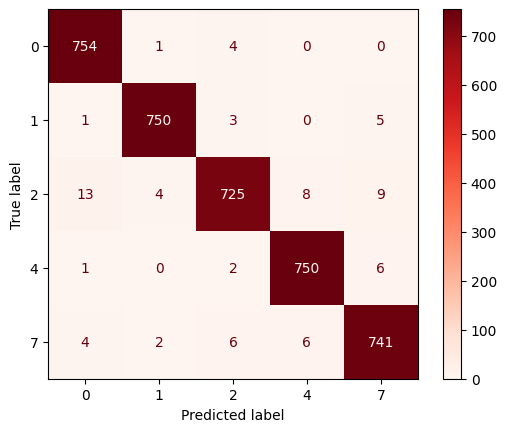

In [50]:
predictions4 = model54.predict(encoded_test_128,verbose=1)
p_class4 = np.argmax(predictions4, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm4=confusion_matrix(test_out, p_class4)
display=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

In [51]:
# Model of FCNN with 3 hidden layers for classification 
model51 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model51.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model51.fit(encoded_train_64, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.7142 - accuracy: 0.7241
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1830 - accuracy: 0.9417
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9481
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9530
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1400 - accuracy: 0.9544
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1419 - accuracy: 0.9543
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.9581
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1267 - accuracy: 0.9587
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.9589
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

In [53]:
# For getting validation loss and accuracy.
loss_train_64, mse_train_64 = model51.evaluate(encoded_train_64, tr_out)
loss_val_64, mse_val_64 = model51.evaluate(encoded_val_64, val_out)
loss_test_64, mse_test_64 = model51.evaluate(encoded_test_64, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.9792


119/119 [==============================] - 0s 1ms/step


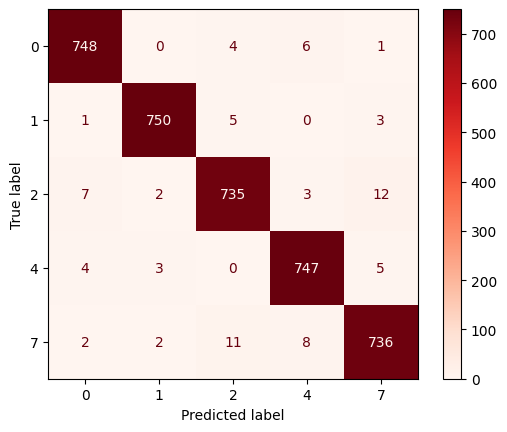

In [54]:
predictions = model51.predict(encoded_test_64,verbose=1)
p_class = np.argmax(predictions, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm=confusion_matrix(test_out, p_class)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

In [55]:
# Model of FCNN with 3 hidden layers for classification 
model52 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(256, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model52.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [56]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained2 = model52.fit(encoded_train_32, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.9345 - accuracy: 0.6265
Epoch 2/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2420 - accuracy: 0.9238
Epoch 3/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9347
Epoch 4/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1902 - accuracy: 0.9381
Epoch 5/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1812 - accuracy: 0.9419
Epoch 6/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1771 - accuracy: 0.9425
Epoch 7/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1696 - accuracy: 0.9459
Epoch 8/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1684 - accuracy: 0.9462
Epoch 9/10000
356/356 [==============================] - 1s 2ms/step - loss: 0.1671 - accuracy: 0.9468
Epoch 10/10000
356/356 [==============================] - 1s 2ms/step - l

In [57]:
# For getting validation loss and accuracy.
loss_train_32, mse_train_32 = model52.evaluate(encoded_train_32, tr_out)
loss_val_32, mse_val_32 = model52.evaluate(encoded_val_32, val_out)
loss_test_32, mse_test_32 = model52.evaluate(encoded_test_32, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9789


119/119 [==============================] - 0s 1ms/step


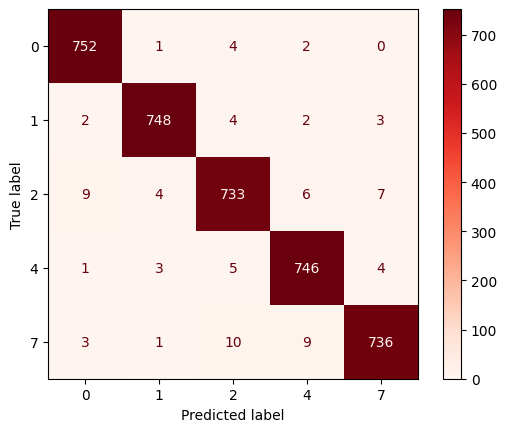

In [58]:
predictions2 = model52.predict(encoded_test_32,verbose=1)
p_class2 = np.argmax(predictions2, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm2=confusion_matrix(test_out, p_class2)
display=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=labels)
display.plot(cmap=plt.cm.Reds)
plt.show()

# Different autoencoders input for model 2 -> 512-512-512

In [59]:
# Model of FCNN with 3 hidden layers for classification 
model61 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model61.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [60]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained = model61.fit(encoded_train_64, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.6976 - accuracy: 0.7258
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2010 - accuracy: 0.9348
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1738 - accuracy: 0.9434
Epoch 4/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1521 - accuracy: 0.9512
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1490 - accuracy: 0.9534
Epoch 6/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1442 - accuracy: 0.9522
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1387 - accuracy: 0.9555
Epoch 8/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1325 - accuracy: 0.9578
Epoch 9/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1276 - accuracy: 0.9593
Epoch 10/10000
356/356 [==============================] - 1s 3ms/step - l

In [61]:
loss_train_64, mse_train_64 = model51.evaluate(encoded_train_64, tr_out)
loss_val_64, mse_val_64 = model51.evaluate(encoded_val_64, val_out)
loss_test_64, mse_test_64 = model51.evaluate(encoded_test_64, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.9792


119/119 [==============================] - 0s 1ms/step


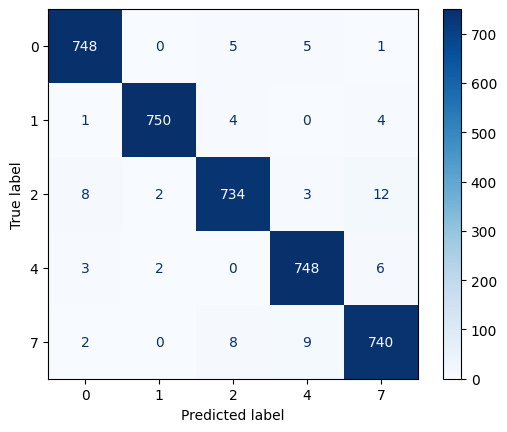

In [62]:
predictions = model61.predict(encoded_test_64,verbose=1)
p_class = np.argmax(predictions, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm=confusion_matrix(test_out, p_class)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [63]:
# Model of FCNN with 3 hidden layers for classification 
model62 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model62.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [64]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained2 = model62.fit(encoded_train_32, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 1.0346 - accuracy: 0.5603
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9138
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.9266
Epoch 4/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.2002 - accuracy: 0.9355
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1907 - accuracy: 0.9377
Epoch 6/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1852 - accuracy: 0.9393
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1736 - accuracy: 0.9429
Epoch 8/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1715 - accuracy: 0.9426
Epoch 9/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1682 - accuracy: 0.9454
Epoch 10/10000
356/356 [==============================] - 1s 3ms/step - l

In [65]:
# For getting validation loss and accuracy.
loss_train_32, mse_train_32 = model62.evaluate(encoded_train_32, tr_out)
loss_val_32, mse_val_32 = model62.evaluate(encoded_val_32, val_out)
loss_test_32, mse_test_32 = model62.evaluate(encoded_test_32, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.9797


119/119 [==============================] - 0s 1ms/step


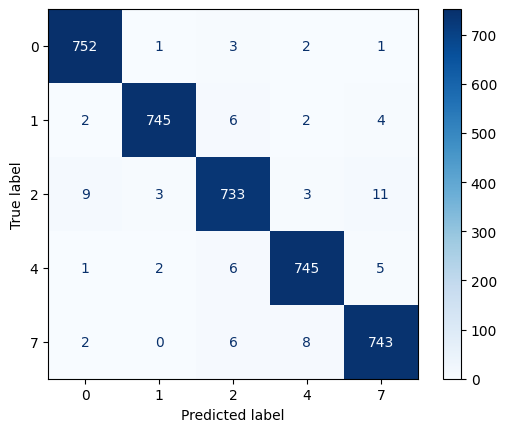

In [66]:
predictions2 = model62.predict(encoded_test_32,verbose=1)
p_class2 = np.argmax(predictions2, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm2=confusion_matrix(test_out, p_class2)
display=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
# Model of FCNN with 3 hidden layers for classification 
model63 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model63.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [68]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained3 = model63.fit(encoded_train_256, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.8344
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1131 - accuracy: 0.9657
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9743
Epoch 4/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9747
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0672 - accuracy: 0.9767
Epoch 6/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0603 - accuracy: 0.9795
Epoch 7/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0586 - accuracy: 0.9804
Epoch 8/10000
356/356 [==============================] - 1s 4ms/step - loss: 0.0498 - accuracy: 0.9843
Epoch 9/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0454 - accuracy: 0.9854
Epoch 10/10000
356/356 [==============================] - 1s 4ms/step - l

In [69]:
# For getting validation loss and accuracy.
loss_train_256, mse_train_256 = model63.evaluate(encoded_train_256, tr_out)
loss_val_256, mse_val_256 = model63.evaluate(encoded_val_256, val_out)
loss_test_256, mse_test_256 = model63.evaluate(encoded_test_256, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.9805


119/119 [==============================] - 0s 1ms/step


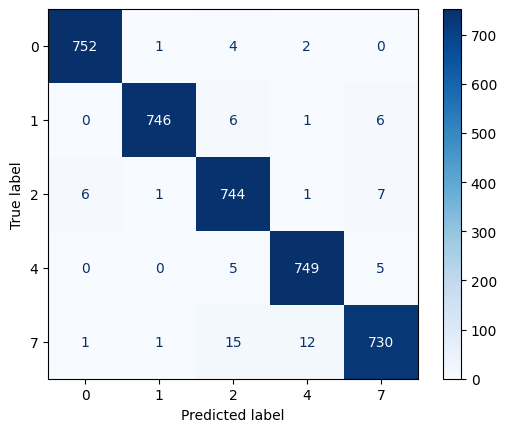

In [70]:
predictions3 = model63.predict(encoded_test_256,verbose=1)
p_class3 = np.argmax(predictions3, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm3=confusion_matrix(test_out, p_class3)
display=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [71]:
# Model of FCNN with 3 hidden layers for classification 
model64 = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28), name='Input_Layer'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(512, activation='sigmoid', name='Hidden_Layer_3'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer')
])
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name='Adam')
model64.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [72]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=10)
trained4 = model64.fit(encoded_train_128, tr_out, epochs=10000, callbacks=callback)

Epoch 1/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.5300 - accuracy: 0.7954
Epoch 2/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9497
Epoch 3/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1354 - accuracy: 0.9565
Epoch 4/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9601
Epoch 5/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1116 - accuracy: 0.9643
Epoch 6/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.1035 - accuracy: 0.9665
Epoch 7/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0983 - accuracy: 0.9679
Epoch 8/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9713
Epoch 9/10000
356/356 [==============================] - 1s 3ms/step - loss: 0.0868 - accuracy: 0.9727
Epoch 10/10000
356/356 [==============================] - 1s 3ms/step - l

In [73]:
# For getting validation loss and accuracy.
loss_train_128, mse_train_128 = model64.evaluate(encoded_train_128, tr_out)
loss_val_128, mse_val_128 = model64.evaluate(encoded_val_128, val_out)
loss_test_128, mse_test_128 = model64.evaluate(encoded_test_128, test_out)

119/119 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9800


119/119 [==============================] - 0s 1ms/step


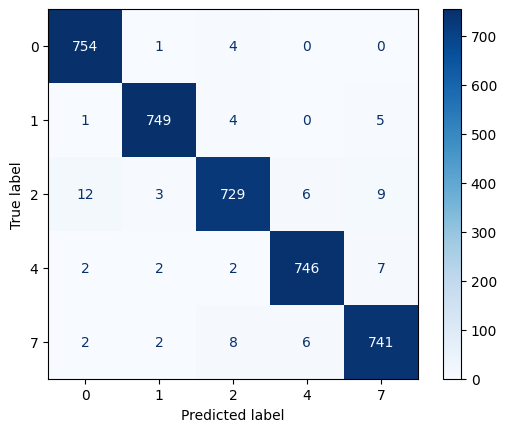

In [74]:
predictions4 = model64.predict(encoded_test_128,verbose=1)
p_class4 = np.argmax(predictions4, axis=1)
# cm = tf.math.confusion_matrix(test_out, p_class)
cm4=confusion_matrix(test_out, p_class4)
display=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=labels)
display.plot(cmap=plt.cm.Blues)
plt.show()